In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
#Import important python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [22]:
# load the iris dataset
iris_data = pd.read_csv('/content/drive/MyDrive/datasets/iris.data')
features = ["Sepal_length","Sepal_width","Petal_length","Petal_width","Flower_Class"]

dataframe = pd.DataFrame(iris_data)

feature_names = dataframe.columns

dataframe.columns = features
dataframe.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Flower_Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# display basic information before cleaning
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Flower_Class  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
# remove duplicates
dropped_dupl = dataframe.drop_duplicates()
dropped_dupl

,Sepal_length,Sepal_width,Petal_length,Petal_width,Flower_Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [48]:
# display basic information after cleaning
updated_df = dropped_dupl.dropna()
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  147 non-null    float64
 1   Sepal_width   147 non-null    float64
 2   Petal_length  147 non-null    float64
 3   Petal_width   147 non-null    float64
 4   Flower_Class  147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [51]:
# converting the flower class into a numerical data
label_encoder = LabelEncoder()

updated_df['Class_Name'] = label_encoder.fit_transform(updated_df['Flower_Class'])

updated_df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Flower_Class,Class_Name
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [52]:
# Dropping the Flower_Class to avoid error in plotting heatmap
updated_df = updated_df.drop(columns=['Flower_Class'])

updated_df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class_Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


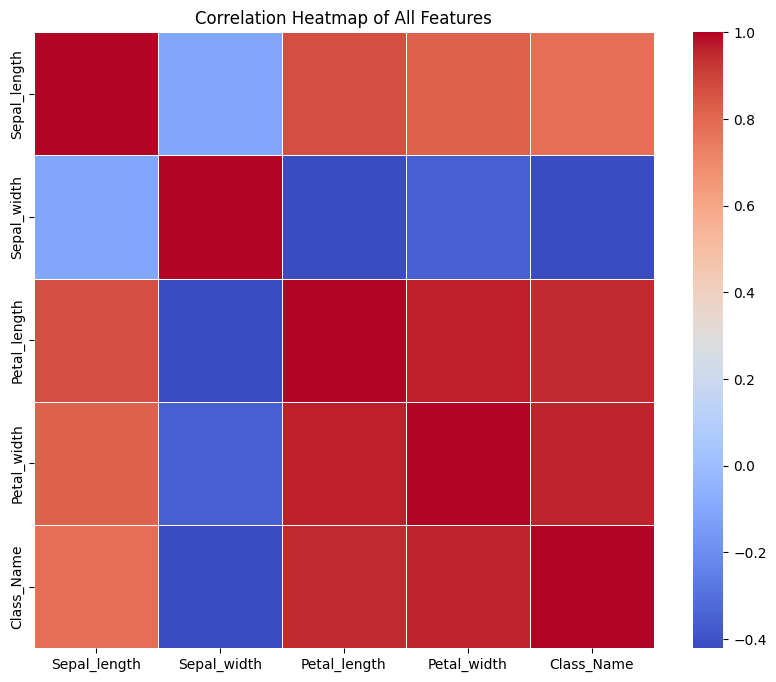

In [53]:
# Correlation matrix calculation for all features
corr_mat = updated_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

In [55]:
# Drop the last column
last_column = updated_df.columns[-1]
X = updated_df.drop(last_column, axis=1)
y = updated_df[last_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

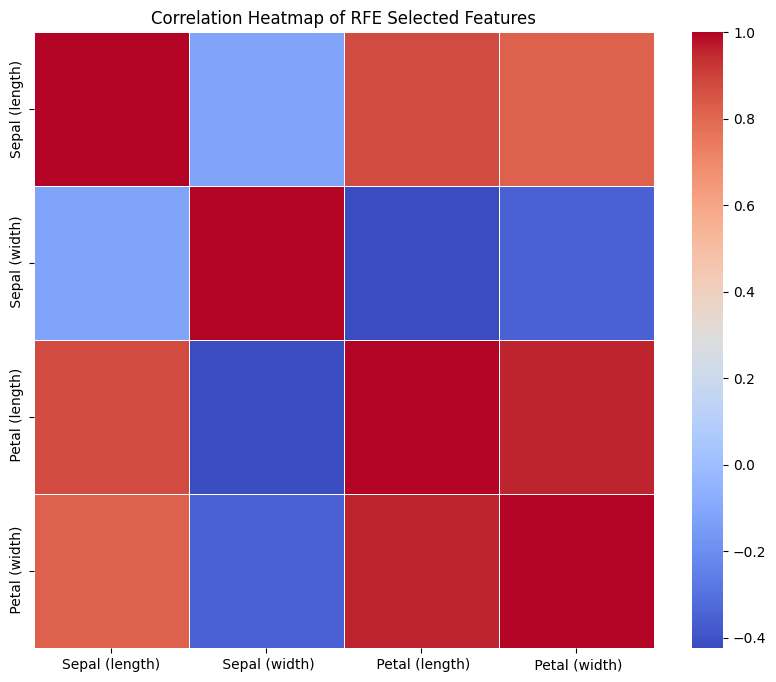

In [56]:
# Create RFE object and specify the number of features to select
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)

# Fit RFE to training data (excluding the target variable)
rfe.fit(X_train, y_train)

# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Convert selected features to DataFrame
df_selected_features = pd.DataFrame(X_train_selected, columns=[feature_names[i] for i, selected in enumerate(rfe.support_) if selected])

# Calculate correlation matrix for selected features
correlation_matrix_selected = df_selected_features.corr()

# Plot correlation heatmap for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of RFE Selected Features')
plt.show()

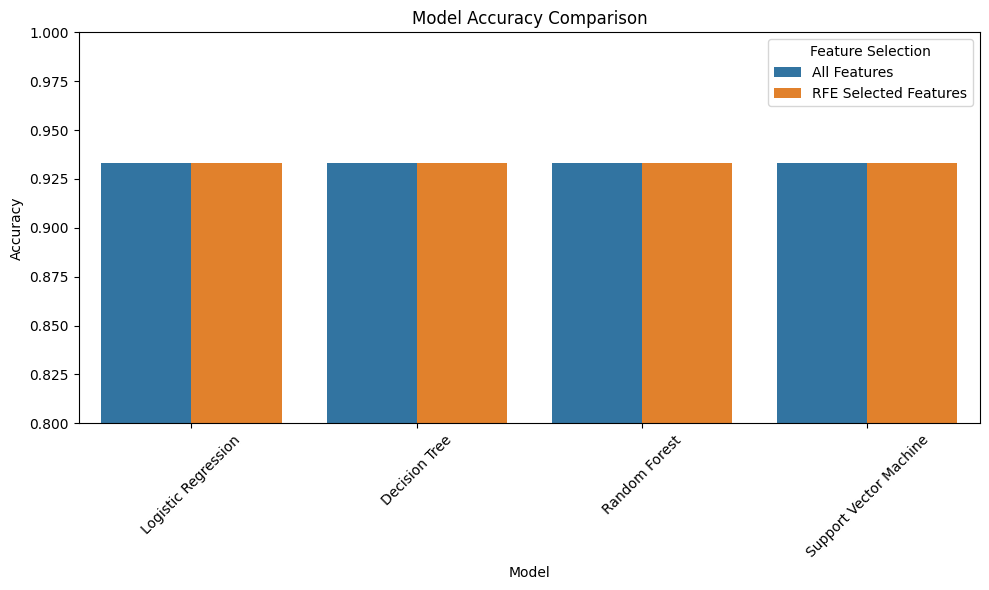

In [57]:
random_seed = 42

# Define models with random seed
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=random_seed),
    "Decision Tree": DecisionTreeClassifier(random_state=random_seed),
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Support Vector Machine": SVC(random_state=random_seed)
}

# Train and evaluate models with all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

# Train and evaluate models with RFE-selected features
results_rfe_selected_features = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy

# Plotting
results_df = pd.DataFrame({
    "Model": list(results_all_features.keys()) + list(results_rfe_selected_features.keys()),
    "Accuracy": list(results_all_features.values()) + list(results_rfe_selected_features.values()),
    "Feature Selection": ['All Features'] * len(models) + ['RFE Selected Features'] * len(models)
})

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Feature Selection')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.legend(title='Feature Selection')
plt.tight_layout()
plt.show()

In [58]:
# Train and evaluate models with all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

# Print scores before RFE
print("Scores with all features and without any added techniques:")
for name, accuracy in results_all_features.items():
    print(f"{name}: {accuracy*100:.2f}%")

# Train and evaluate models with RFE-selected features
results_rfe_selected_features = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy

# Print scores after RFE
print("\nScores with RFE-selected features:")
for name, accuracy in results_rfe_selected_features.items():
    print(f"{name}: {accuracy*100:.2f}%")

Scores with all features and without any added techniques:
Logistic Regression: 93.33%
Decision Tree: 93.33%
Random Forest: 93.33%
Support Vector Machine: 93.33%

Scores with RFE-selected features:
Logistic Regression: 93.33%
Decision Tree: 93.33%
Random Forest: 93.33%
Support Vector Machine: 93.33%


Accuracies without cross validation
Logistic Regression: 0.9667
Decision Tree: 0.9333
Random Forest: 0.9333
Support Vector Machine: 0.9333

Accuracies with cross validation
Logistic Regression: 0.9572
Decision Tree: 0.9489
Random Forest: 0.9659
Support Vector Machine: 0.9743


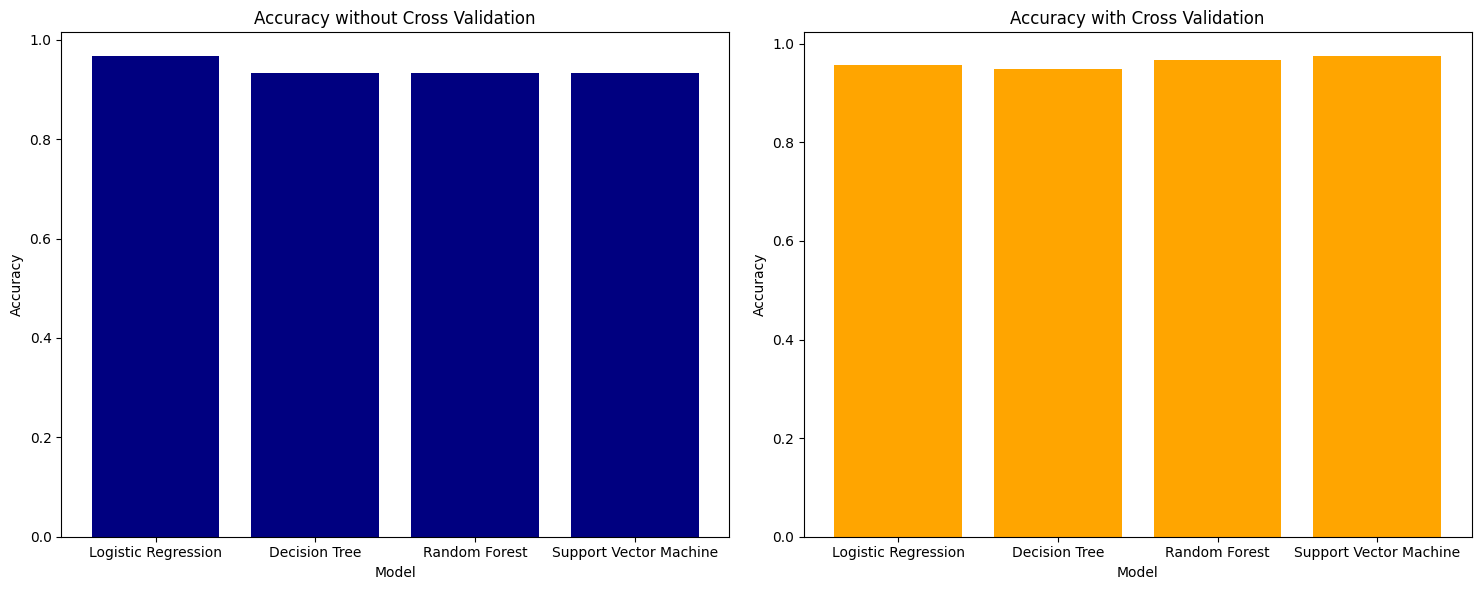

In [59]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Results without cross-validation
accuracies_no_cv = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    accuracies_no_cv[name] = model.score(X_test_scaled, y_test)

print("Accuracies without cross validation")
for name, acc in accuracies_no_cv.items():
    print(f"{name}: {acc:.4f}")

# Results with cross-validation
accuracies_cv = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    accuracies_cv[name] = np.mean(cv_scores)

print("\nAccuracies with cross validation")
for name, acc in accuracies_cv.items():
    print(f"{name}: {acc:.4f}")

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot without cross-validation
ax[0].bar(accuracies_no_cv.keys(), accuracies_no_cv.values(), color='navy')
ax[0].set_title('Accuracy without Cross Validation')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')

# Bar plot with cross-validation
ax[1].bar(accuracies_cv.keys(), accuracies_cv.values(), color='orange')
ax[1].set_title('Accuracy with Cross Validation')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

                    Model  Accuracy      Feature Selection
0     Logistic Regression  0.957246           All Features
1           Decision Tree  0.948913           All Features
2           Random Forest  0.965942           All Features
3  Support Vector Machine  0.974275           All Features
4     Logistic Regression  0.933333  RFE Selected Features
5           Decision Tree  0.933333  RFE Selected Features
6           Random Forest  0.933333  RFE Selected Features
7  Support Vector Machine  0.933333  RFE Selected Features


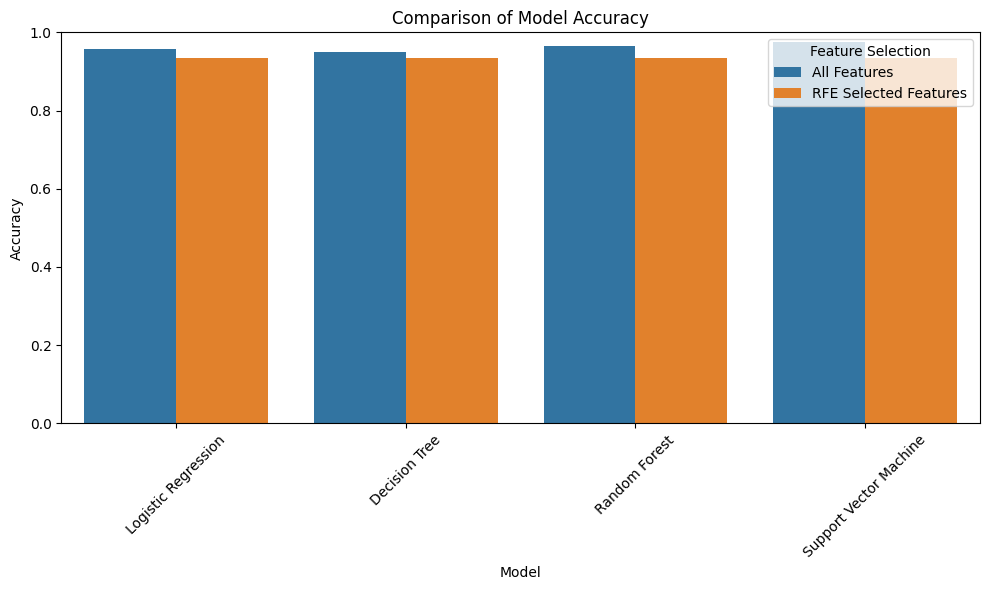

In [61]:
# Train and evaluate models with RFE-selected features
results_rfe_selected_features = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy

# Plotting
results_df = pd.DataFrame({
    "Model": list(accuracies_cv.keys()) + list(results_rfe_selected_features.keys()),
    "Accuracy": list(accuracies_cv.values()) + list(results_rfe_selected_features.values()),
    "Feature Selection": ['All Features'] * len(models) + ['RFE Selected Features'] * len(models)
})

print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Feature Selection')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.legend(title='Feature Selection')
plt.tight_layout()
plt.show()